In [1]:
import numpy as np  #does mathematical operation
import matplotlib.pyplot as plt #For plotting the graphs
import pandas as pd #making the data frames and import the csv files


In [2]:
from google.colab import drive #to import the google drive data

In [3]:
drive.mount('/content/drive')   # to mount the drive data into the colab cloud and enter the activation code

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
cd /content/drive/"My Drive/ML nishit sir/Hiearchical Clusturing" 

/content/drive/My Drive/ML nishit sir/Hiearchical Clusturing


In [5]:
dataset = pd.read_csv('KMeans.csv')

In [6]:
X = dataset.iloc[:, [1, 2]].values

In [7]:
dataset

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [8]:
X.shape

(200, 2)

In [9]:
import scipy.cluster.hierarchy as sch

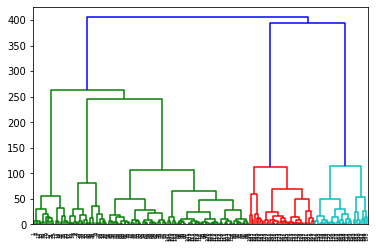

In [10]:
dendogram = sch.dendrogram(sch.linkage(X,method='ward'))

In [11]:
from sklearn.cluster import AgglomerativeClustering

In [12]:
hc = AgglomerativeClustering(n_clusters=5,affinity ='euclidean', linkage = 'ward')

In [13]:
y_hc = hc.fit_predict(X)

In [14]:
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

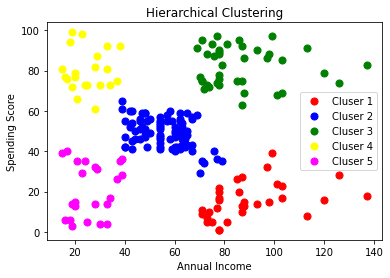

In [15]:
#Visualiz the Cluster
plt.scatter(X[y_hc==0,0],X[y_hc==0,1],s=50,c='red',label='Cluser 1')
plt.scatter(X[y_hc==1,0],X[y_hc==1,1],s=50,c='blue',label='Cluser 2')
plt.scatter(X[y_hc==2,0],X[y_hc==2,1],s=50,c='green',label='Cluser 3')
plt.scatter(X[y_hc==3,0],X[y_hc==3,1],s=50,c='yellow',label='Cluser 4')
plt.scatter(X[y_hc==4,0],X[y_hc==4,1],s=50,c='magenta',label='Cluser 5')
plt.title('Hierarchical Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()

In [16]:
from sklearn.cluster import KMeans

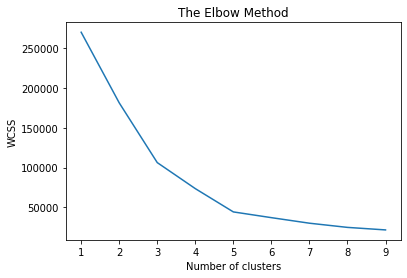

In [17]:
# Using the elbow method to find the optimal number of clusters
# wcss within cluster sum of square
wcss=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,10),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [18]:
# Fitting K-Means to the dataset
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=0) #random_state = 0 (Every time when we run our program we will get the same output)
y_kmeans=kmeans.fit_predict(X)

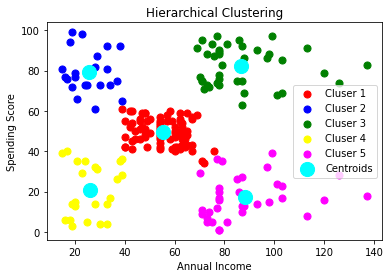

In [19]:
#Visualiz the Cluster
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=50,c='red',label='Cluser 1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=50,c='blue',label='Cluser 2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=50,c='green',label='Cluser 3')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=50,c='yellow',label='Cluser 4')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=50,c='magenta',label='Cluser 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'cyan', label = 'Centroids')

plt.title('Hierarchical Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()